# Limpeza de Dados (Não estruturado)

Objetivo: mostrar algumas rotinas de NLP e REGEX para limpeza de dados. Faremos um exemplo de limpeza de textos de tweeter com objetivo de visualizar via wordclouds.

In [1]:
# bibliotecas necessárias para nosso experimento
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from   spacy  import displacy

import wordcloud
import emoji

import re


In [2]:
# ajustando o engine para a língua utilizada
myspacy = spacy.load("en_core_web_sm")


## Fundamentos

baseado em: https://www.opensourceforu.com/2020/07/using-spacy-for-natural-language-processing-and-visualisation/


In [10]:
#some_text = "This is some example text that I will be using to demonstrate the features of spacy."
some_text = "Digital Humanities is a promising area."

### Tokens

In [11]:
read_text = myspacy(some_text)

print([token.text for token in read_text])

['Digital', 'Humanities', 'is', 'a', 'promising', 'area', '.']


### Frases

In [12]:
sentences = list(read_text.sents)
for sentence in sentences:
    print(sentence)

Digital Humanities is a promising area.


### Removendo Stop Words

In [13]:
[token.text for token in read_text if not token.is_stop]

['Digital', 'Humanities', 'promising', 'area', '.']

### Lema

In [14]:
lemas = [(word, word.lemma_) for word in read_text]

pd.DataFrame(columns = ["Palavra", "Lema"],data=lemas)


,Palavra,Lema
0,Digital,Digital
1,Humanities,Humanities
2,is,be
3,a,a
4,promising,promising
5,area,area
6,.,.


### POS Tagging

In [15]:
pos = [(word, word.pos_, spacy.explain(word.pos_)) for word in read_text]

pd.DataFrame(columns = ["Palavra","POS","Descrição"], data = pos)    

,Palavra,POS,Descrição
0,Digital,PROPN,proper noun
1,Humanities,PROPN,proper noun
2,is,AUX,auxiliary
3,a,DET,determiner
4,promising,ADJ,adjective
5,area,NOUN,noun
6,.,PUNCT,punctuation


In [17]:
sample_text = "Digital Humanities is a promising area." #"Rainy weather."
read_text   = myspacy(sample_text)
displacy.render(read_text, style="dep")

### NER

In [18]:
sample_text = "Every year, Hyderabd hosts the biggest exhibition in India. It has fun rides and food stalls. At least a million people visit it every year."
#sample_text = some_text
read_text = myspacy(sample_text)
displacy.render(read_text, style="ent")

# Exemplo - Limpando Tweets

– Remover retweet text “RT”

– Remover hyperlinks

– Remover hashtags (only the hashtag # and not the word)

– Remover stop words E.g. "a", "and", "the", "is", "are", etc.

– Remover emojis.

– Remover pontuação

– Stemming E.g. ‘working’, ‘works’, and ‘worked’ -> “work”.


In [19]:
tweets = ["RT @john: The economy was growing 3 times faster before Covid 😒 ",
          "About Covid ... We should always use 😷 #usemask",
          "Covid ... take care all you!!!",
          "VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY",
          "Covid: Total deaths in the U.S. has increased in recent days."
          "We must empathize with others. Do not spread this virus.",
          "There are promising vaccines in the third phase!!! 👊",
          "The economy must continue!!!"
         ]


In [20]:
emoji.UNICODE_EMOJI

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰': ':A_button_(blood_type):',
 '🅰️': ':A_button_(blood_type)_selector:',
 '🇦🇫': ':Afghanistan:',
 '🇦🇽': ':Aland_Islands:',
 '🇦🇱': ':Albania:',
 '🇩🇿': ':Algeria:',
 '🇦🇸': ':American_Samoa:',
 '🇦🇩': ':Andorra:',
 '🇦🇴': ':Angola:',
 '🇦🇮': ':Anguilla:',
 '🇦🇶': ':Antarctica:',
 '🇦🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦🇲': ':Armenia:',
 '🇦🇼': ':Aruba:',
 '🇦🇨': ':Ascension_Island:',
 '🇦🇺': ':Australia:',
 '🇦🇹': ':Austria:',
 '🇦🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱': ':B_button_(blood_type):',
 '🅱️': ':B_button_(blood_type)_selector:',
 '🇧🇸': ':Bahamas:',
 '🇧🇭': ':Bahrain:',
 '🇧🇩': ':Bangladesh:',
 '🇧🇧': ':Barbados:',
 '🇧🇾': ':Belarus:',
 '🇧🇪': ':Belgium:',
 '🇧🇿': ':Belize:',
 '🇧🇯': ':Benin:',
 '🇧🇲': ':Bermuda:',
 '🇧🇹': ':Bhutan:',
 '🇧🇴': ':Bolivia:',
 '🇧🇦': ':Bosnia_&_Herzegovina:',
 '🇧🇼': ':Botswana

### Limpeza por expressões regulares (Regex)

In [21]:
#tweet = re.sub(r'\$\w*', '', tweet)
new_tweets = []
for tweet in tweets: 

    # remover "nova linha"
    tweet = re.sub(r'\n', ' . ', tweet)

    # remover "@nome"
    tweet = re.sub(r'@\w+', '', tweet)

    # remover "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remover hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # removendo hashtag + nome
    tweet = re.sub(r'#\w+', '', tweet)
    
    # removendo emojis com o pacote emoji
    tweet = emoji.get_emoji_regexp().sub(u'', tweet)
    
    new_tweets.append(tweet)
    

In [22]:
new_tweets

[': The economy was growing 3 times faster before Covid  ',
 'About Covid ... We should always use  ',
 'Covid ... take care all you!!!',
 'VIDEO: Sturgeon on post-election deals ',
 'Covid: Total deaths in the U.S. has increased in recent days.We must empathize with others. Do not spread this virus.',
 'There are promising vaccines in the third phase!!! ',
 'The economy must continue!!!']

### Filtrando apenas substantivos e nomes próprios

In [23]:
words = []
for tweet in new_tweets:
    read_text = myspacy(tweet)
    for token in read_text:
        print(token,token.lemma_,token.pos_)
        if not token.is_stop and token.pos_ in ["NOUN","PROPN"]:
           words.append(str(token.lemma_))

: : PUNCT
The the DET
economy economy NOUN
was be AUX
growing grow VERB
3 3 NUM
times time NOUN
faster faster ADV
before before ADP
Covid Covid PROPN
    SPACE
About about ADP
Covid Covid PROPN
... ... PUNCT
We -PRON- PRON
should should AUX
always always ADV
use use VERB
    SPACE
Covid Covid PROPN
... ... PUNCT
take take VERB
care care NOUN
all all DET
you -PRON- PRON
! ! PUNCT
! ! PUNCT
! ! PUNCT
VIDEO video NOUN
: : PUNCT
Sturgeon sturgeon NOUN
on on ADP
post post ADJ
- - ADJ
election election NOUN
deals deal NOUN
Covid Covid PROPN
: : PUNCT
Total total ADJ
deaths death NOUN
in in ADP
the the DET
U.S. U.S. PROPN
has have AUX
increased increase VERB
in in ADP
recent recent ADJ
days day NOUN
. . PUNCT
We -PRON- PRON
must must AUX
empathize empathize VERB
with with ADP
others other NOUN
. . PUNCT
Do do AUX
not not PART
spread spread VERB
this this DET
virus virus NOUN
. . PUNCT
There there PRON
are be AUX
promising promise VERB
vaccines vaccine NOUN
in in ADP
the the DET
third third AD

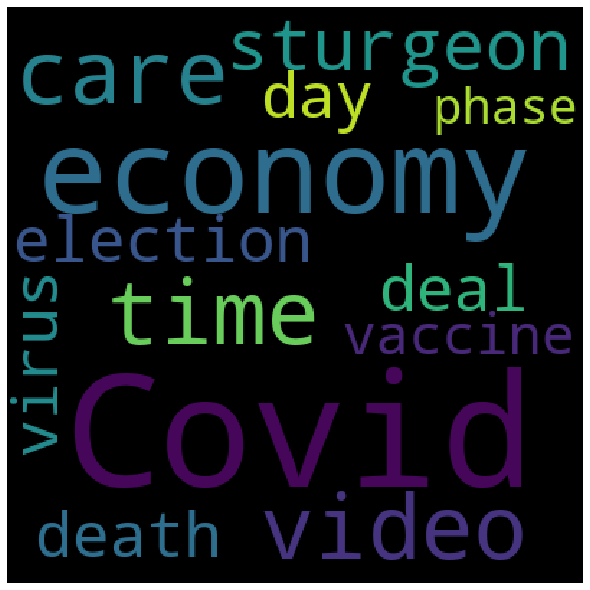

In [24]:
import wordcloud 
str_words = " ".join(words)
wordcloud = wordcloud.WordCloud(width = 400, height = 400, 
                background_color ='black',
                min_font_size = 10).generate(str_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 